In [1]:
# Bike Rental KNN Regression Project

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
df1 = pd.read_csv('day.csv')
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
df.describe

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [17]:
df['temp'] = df['temp'].apply(lambda x: x*41)
df['atemp'] = round(df['atemp'].apply(lambda x: x*50),2)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.69,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.61,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46,0.436957,0.186900,82,1518,1600


In [27]:
features = ['temp', 'hum', 'windspeed', 'season', 'holiday', 'workingday', 'weathersit','yr','mnth','atemp','casual','registered']
target = 'cnt'

In [28]:
X = df[features]
y = df[target]

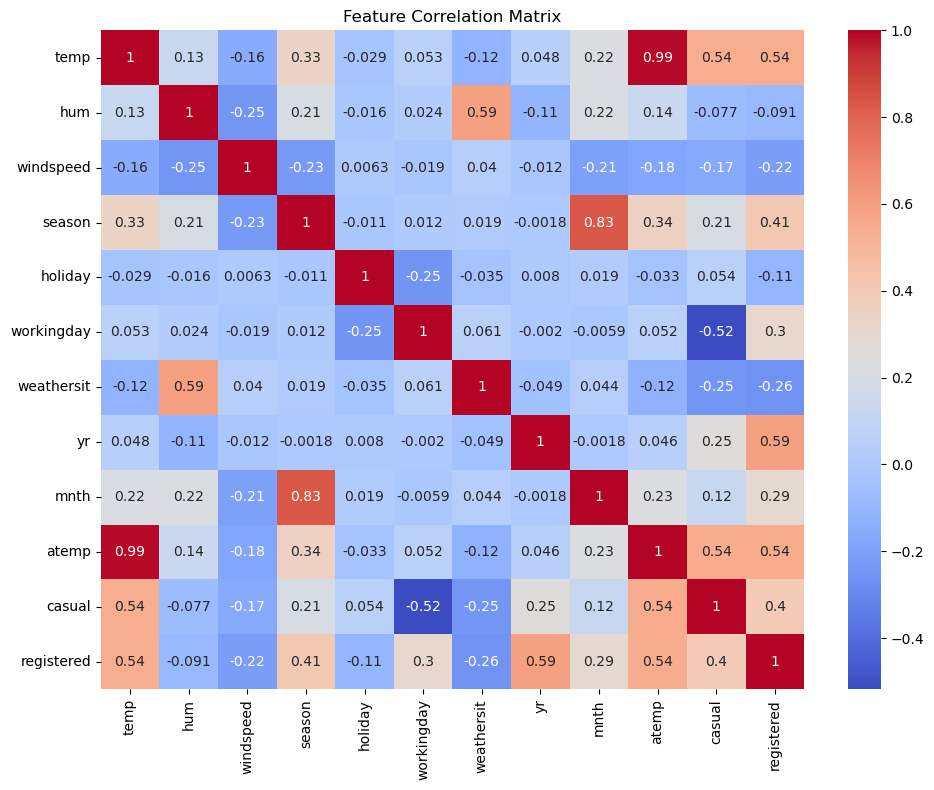

In [29]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [33]:
df=df.drop(['dteday'], axis=1)

In [34]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.69,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.61,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46,0.436957,0.186900,82,1518,1600


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
k_values = range(1, 31)
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

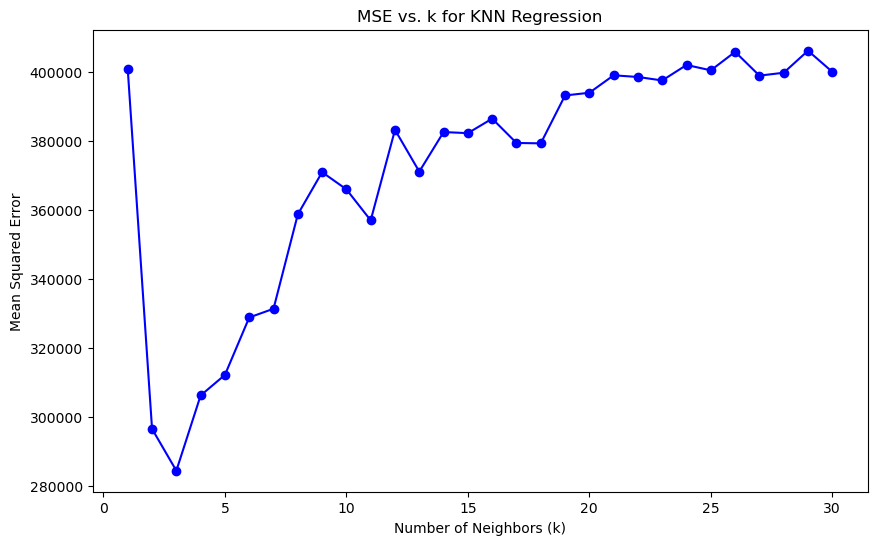

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_scores, 'bo-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. k for KNN Regression')
plt.show()

In [39]:
optimal_k = k_values[np.argmin(mse_scores)]
print(f"Optimal k value: {optimal_k}")

Optimal k value: 3


In [40]:
final_model = KNeighborsRegressor(n_neighbors=optimal_k)
final_model.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=3)

In [41]:
y_pred = final_model.predict(X_test_scaled)

In [42]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Root Mean Squared Error: 533.33
R-squared Score: 0.93


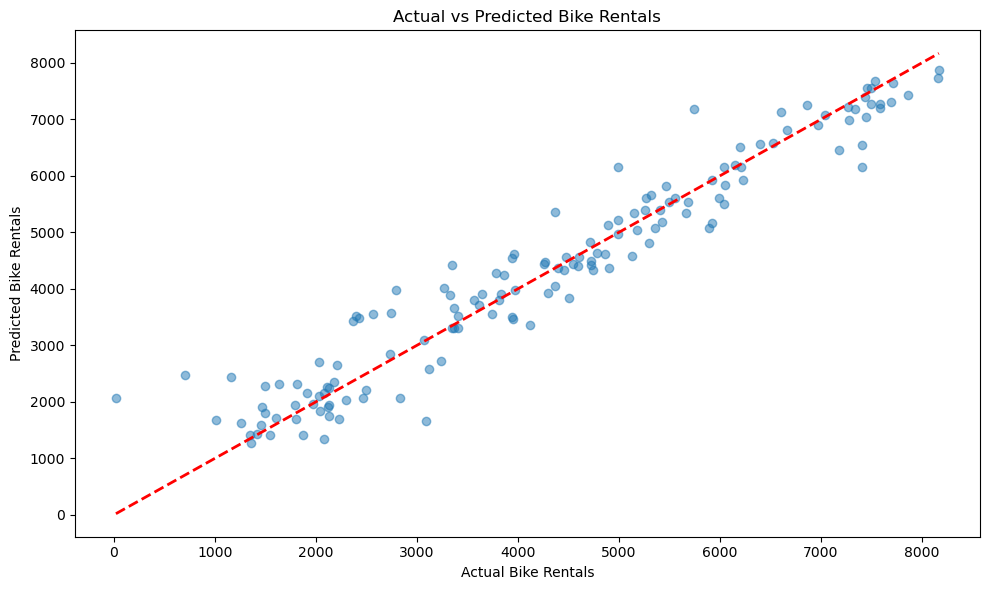

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Bike Rentals")
plt.ylabel("Predicted Bike Rentals")
plt.title("Actual vs Predicted Bike Rentals")
plt.tight_layout()
plt.show()

In [44]:
feature_importance = pd.DataFrame({'feature': features, 'importance': abs(X[features].corrwith(y))})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
               feature  importance
registered  registered    0.945517
casual          casual    0.672804
atemp            atemp    0.631076
temp              temp    0.627494
yr                  yr    0.566710
season          season    0.406100
weathersit  weathersit    0.297391
mnth              mnth    0.279977
windspeed    windspeed    0.234545
hum                hum    0.100659
holiday        holiday    0.068348
workingday  workingday    0.061156


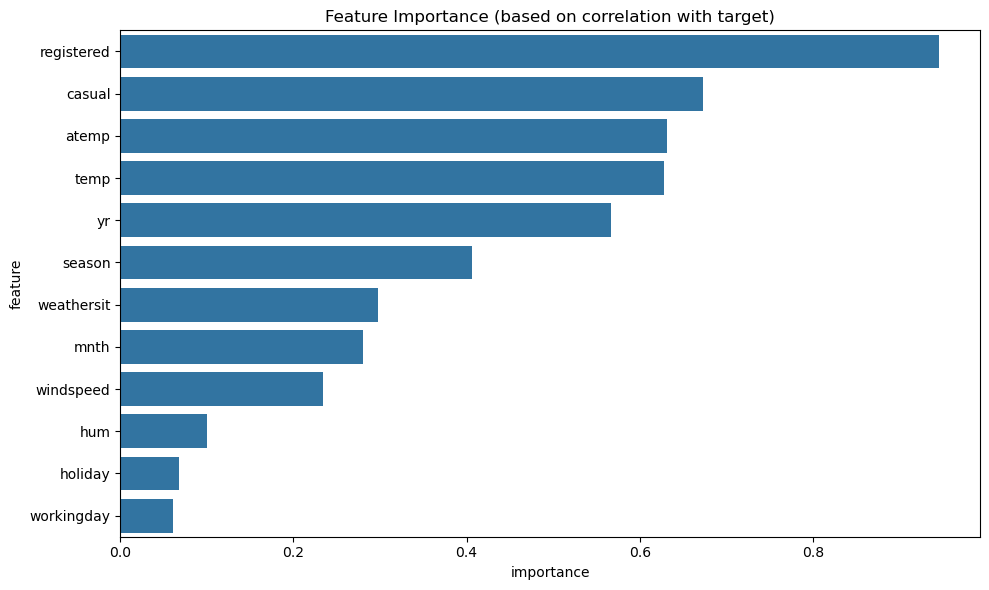

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title("Feature Importance (based on correlation with target)")
plt.tight_layout()
plt.show()